In [1]:
import os
os.getcwd()

'/Users/lexinyi/Documents/southern ridges competition/(final submit) southern ridges quant competition/Southern ridges competition submit/Model Code'

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stoxx_data = pd.read_csv("../Model Data/stoxx_till_2018.csv")
stoxx_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,2974.860107,3017.800049,2974.860107,3017.800049,3017.800049,0
1,2010-01-05,3016.639893,3025.600098,3006.469971,3012.360107,3012.360107,0
2,2010-01-06,3010.889893,3016.830078,2997.050049,3009.659912,3009.659912,0
3,2010-01-07,3000.139893,3013.899902,2979.800049,3007.340088,3007.340088,0
4,2010-01-08,3012.969971,3024.580078,2993.729980,3017.850098,3017.850098,0
...,...,...,...,...,...,...,...
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600


这里我们构建反转指标，这是一个反向指标

In [5]:
price_change = (stoxx_data["Close"]-stoxx_data["Close"].shift(1))
stoxx_data["price_change"] = price_change
stoxx_data.loc[0, "price_change"] = 0
price_change = price_change[1: ]
print(price_change)
stoxx_data.tail()

1       -5.439942
2       -2.700195
3       -2.319824
4       10.510010
5       -7.610108
          ...    
2256    11.250000
2257   -51.319824
2258     0.550048
2259   -63.250000
2260    49.169922
Name: Close, Length: 2260, dtype: float64


,Date,Open,High,Low,Close,Adj Close,Volume,price_change
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922


In [6]:
price_change_factor = stoxx_data["price_change"]
max_price_change, min_price_change = np.max(price_change_factor), np.min(price_change_factor)
price_change_normal = (price_change_factor - min_price_change)/(max_price_change - min_price_change)
stoxx_data["price_ch_normal"] = price_change_normal

stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410


这里我们构建RSI指标，这是一个正向指标

In [7]:
def add_n_days_RSI(dataframe, n):
    res = [0] * n
    for i in range(n, dataframe.shape[0]):
        price_change = dataframe.loc[i-n+1: i+1, "price_change"]
        price_change_pos = price_change[price_change >= 0]
        price_change_neg = np.abs(price_change[price_change < 0])
        RSI = 100 * np.mean(price_change_pos) / (np.mean(price_change_pos) + np.mean(price_change_neg))
        res.append(RSI)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_RSI"] = res_normal
    print("add " + str(n) + " days RSI successful!")
add_n_days_RSI(stoxx_data, 10)

add 10 days RSI successful!


这里我们构建range指标，这是一个正向指标

In [8]:
def add_n_days_range(dataframe, n):
    res = [0] * (n - 1)
    for i in range(n - 1, dataframe.shape[0]):
        close_data = dataframe.loc[i-n+1: i+1, "Close"]
        high_data = dataframe.loc[i-n+1: i+1, "High"]
        low_data = dataframe.loc[i-n+1: i+1, "Low"]
        HH = np.max(high_data)
        LC = np.min(close_data)
        HC = np.max(close_data)
        LL = np.min(low_data)
        range_factor = np.max([HH-LC, HC-LL])
        res.append(range_factor)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_range"] = res_normal
    print("successfully add range to dataframe!!")
add_n_days_range(stoxx_data, 10)

successfully add range to dataframe!!


这里我们构建正向波动率减负向波动率指标，这是一个正向指标

In [12]:
def add_n_days_vol(dataframe, n):
    res = [0] * n
    for i in range(n, dataframe.shape[0]):
        data_return = dataframe.loc[i-n+1: i+1, "price_change"]
        return_pos = data_return[data_return >= 0]
        return_neg = data_return[data_return < 0]
        pos_vol = np.std(return_pos)
        neg_vol = np.std(return_neg)
        res.append(pos_vol - neg_vol)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_vol"] = res_normal
    print("add " + str(n) + " days vol successful!")
add_n_days_vol(stoxx_data, 10)

add 10 days vol successful!


这里我们构建偏离度指标，这是一个负向指标

In [9]:
def add_n_days_ma(dataframe, n):
    res = [0] * (n - 1)
    close = dataframe["Close"]
    for i in range(n - 1, dataframe.shape[0]):
        close_data = dataframe.loc[i-n+1: i+1, "Close"]
        res.append(np.mean(close_data))
    res_new = close - res
    max_res, min_res = np.max(res_new), np.min(res_new)
    res_normal = (-1)*(res_new - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_ma"] = res_normal
    print("successfully add ma to dataframe!!")
add_n_days_ma(stoxx_data, 10)

successfully add ma to dataframe!!


In [10]:
from talib import abstract
inputs = {
    'open': stoxx_data['Open'].values,
    'high': stoxx_data['High'].values,
    'low': stoxx_data['Low'].values,
    'close': stoxx_data['Close'].values,
    'volume': stoxx_data['Volume'].astype(float).values
}
talib_list=[('MFI',10),('WMA',7),('CMO',14),('MOM',7),('CCI',14),('ROC',30)]
def add_talib_factor(dataframe):
    for ta in talib_list:
        fun = abstract.Function(ta[0] )
        factor = fun(inputs,ta[1])
        factor[np.isnan(factor)] = 0
#         stoxx_data.fillna(0,inplace=True)
        max_res, min_res = np.max(factor), np.min(factor)
        res_normal = (factor - min_res)/(max_res - min_res)
        dataframe[ta[0]+'_'+str(ta[1])] = res_normal
        print("add " +ta[0]+'_'+str(ta[1])+ "successful!")
add_talib_factor(stoxx_data)

add MFI_10successful!
add WMA_7successful!
add CMO_14successful!
add MOM_7successful!
add CCI_14successful!
add ROC_30successful!


In [13]:
factor_combined = (stoxx_data["10_days_RSI"] + stoxx_data["price_ch_normal"] + 
                   stoxx_data["10_days_range"] + stoxx_data["10_days_vol"] +
                   stoxx_data["10_days_ma"]
#                    +stoxx_data["MFI_10"]
#                    -stoxx_data["WMA_7"]
#                    -stoxx_data["ROC_30"]
#                    -stoxx_data["CCI_14"]
                   -stoxx_data["MOM_7"]
#                    -stoxx_data["CMO_14"]
                  )
                
stoxx_data["factor_combined"] = factor_combined

In [27]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('../Model Data/stoxx_till_2018.csv')
def get_label(df):
    forward_price_change = df["Close"].shift(-1) - df["Close"]
    forward_price_change[df.index[-1]] = 0
    forward_price_return = forward_price_change / df["Close"]
    print(forward_price_return)
#     return forward_price_return.fillna('bfill',inplace=True)
    print(type(forward_price_return))
    return forward_price_return
label = get_label(df)
# print(label)

label[label<-0.005]=-1
label[label>0.005]= 1
label[abs(label)!=1]= 0


# label.describe()
# print(len(label[label>0.005]),len(label[label<-0.005]))
# print(len(label)-696-650)
# stoxx_data["10_days_RSI","price_ch_normal","10_days_range","10_days_vol","10_days_ma","MFI_10",'WMA_7','ROC_30','CCI_14','MOM_10','CMO_14']
x_train,x_test,y_train,y_test = train_test_split(stoxx_data[["10_days_RSI","price_ch_normal","10_days_range","10_days_vol","10_days_ma","MFI_10",'WMA_7','ROC_30','CCI_14','MOM_7','CMO_14']],
                                                 label,
                                                 test_size = 0.3)

0      -0.001803
1      -0.000896
2      -0.000771
3       0.003495
4      -0.002522
          ...   
2256   -0.016819
2257    0.000183
2258   -0.021079
2259    0.016739
2260    0.000000
Name: Close, Length: 2261, dtype: float64
<class 'pandas.core.series.Series'>


[0]	validation_0-mlogloss:1.08505
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.07417
[2]	validation_0-mlogloss:1.06586
[3]	validation_0-mlogloss:1.05798
[4]	validation_0-mlogloss:1.05158
[5]	validation_0-mlogloss:1.04977
[6]	validation_0-mlogloss:1.04308
[7]	validation_0-mlogloss:1.03814
[8]	validation_0-mlogloss:1.03466
[9]	validation_0-mlogloss:1.03007
[10]	validation_0-mlogloss:1.02762
[11]	validation_0-mlogloss:1.02680
[12]	validation_0-mlogloss:1.02408
[13]	validation_0-mlogloss:1.02084
[14]	validation_0-mlogloss:1.01763
[15]	validation_0-mlogloss:1.01699
[16]	validation_0-mlogloss:1.01430
[17]	validation_0-mlogloss:1.01101
[18]	validation_0-mlogloss:1.01008
[19]	validation_0-mlogloss:1.00863
[20]	validation_0-mlogloss:1.00709
[21]	validation_0-mlogloss:1.00542
[22]	validation_0-mlogloss:1.00415
[23]	validation_0-mlogloss:1.00501
[24]	validation_0-mlogloss:1.00530
[25]	validation_0-mlogloss:1.00333
[26]	validation_0-mlogloss:1.00

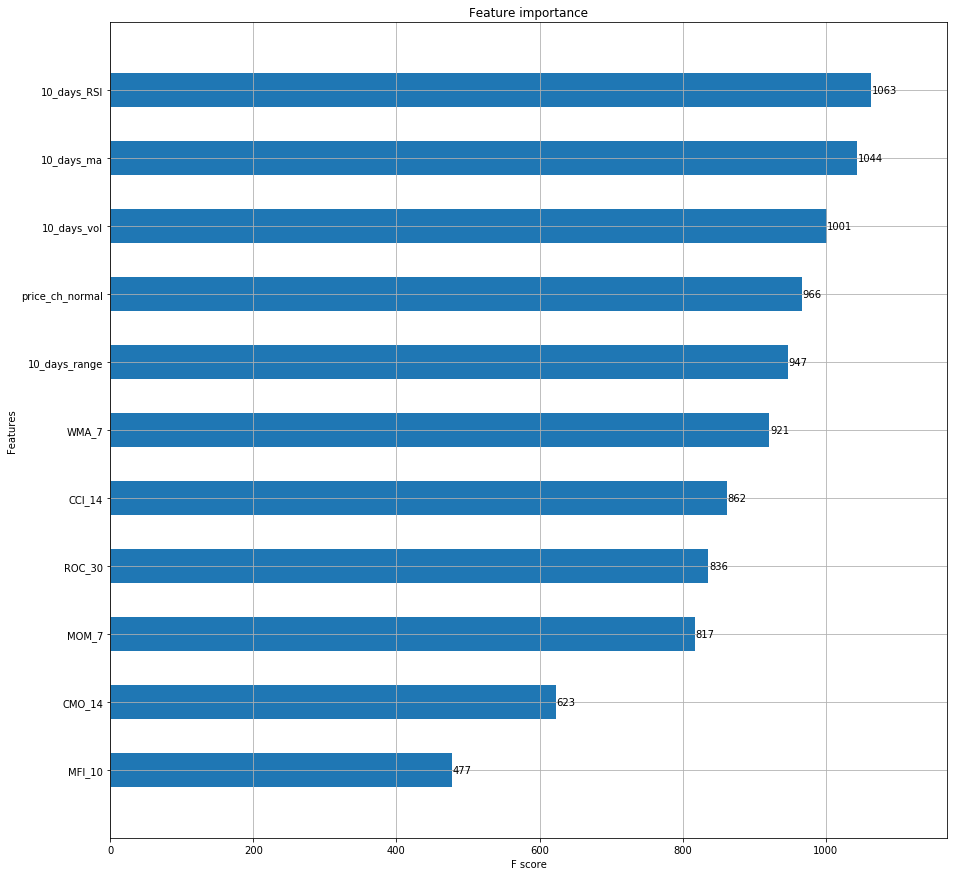

accuarcy: 50.22%


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import plot_importance
model = xgb.XGBClassifier(learning_rate=0.1,
                      n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                      max_depth=6,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      colsample_btree=0.8,       # 随机选择80%特征建立决策树
                      objective='multi:softmax', # 指定损失函数
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27            # 随机数
                      )
model.fit(x_train,
          y_train,
          eval_set = [(x_test,y_test)],
          eval_metric = "mlogloss",
          early_stopping_rounds = 50,
          verbose = True)

### plot feature importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(model,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()
y_pred = model.predict(x_test)

### model evaluate
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

In [53]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(C=1000,random_state=123)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(u"混淆矩阵",confusion_matrix(y_true=y_test,y_pred=y_pred,labels=[-1,0,1]))
print("正确率：",accuracy_score(y_test,y_pred))


混淆矩阵 [[ 63  87  36]
 [ 29 202  56]
 [ 30  97  79]]
正确率： 0.5066273932253313


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,labels=[-1,0,1]))

              precision    recall  f1-score   support

        -1.0       0.52      0.34      0.41       186
         0.0       0.52      0.70      0.60       287
         1.0       0.46      0.38      0.42       206

    accuracy                           0.51       679
   macro avg       0.50      0.48      0.48       679
weighted avg       0.50      0.51      0.49       679

[[ 63  87  36]
 [ 29 202  56]
 [ 30  97  79]]


In [55]:
factor_combined.describe()

count    2261.000000
mean        1.139913
std         0.232929
min        -0.585470
25%         1.008972
50%         1.129410
75%         1.259761
max         2.792678
dtype: float64

In [56]:
stoxx_data["portfolio value"] = [1000000] * len(stoxx_data.index)

# stoxx_data.fillna(0,inplace=True)
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,...,10_days_ma,MFI_10,WMA_7,CMO_14,MOM_7,CCI_14,ROC_30,10_days_vol,factor_combined,portfolio value
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.366580,...,-0.095793,0.418643,0.807739,0.355830,0.613015,0.341065,0.438017,0.469336,0.850856,1000000
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.398354,...,-0.081685,0.419148,0.802823,0.267730,0.513273,0.258616,0.407668,0.586743,1.014788,1000000
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.380815,...,-0.085142,0.381765,0.798463,0.269420,0.455308,0.211851,0.413338,0.571185,1.205481,1000000
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.434497,...,-0.067064,0.380733,0.790948,0.176942,0.380266,0.145172,0.391763,0.567732,1.226251,1000000
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.409311,...,-0.082197,0.367090,0.788315,0.318110,0.456743,0.267853,0.406480,0.576177,1.333891,1000000


In [57]:
print(len(label),len(y_train))

2261 1582


In [58]:
stoxx_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'price_change', 'price_ch_normal', '10_days_RSI', '10_days_range',
       '10_days_ma', 'MFI_10', 'WMA_7', 'CMO_14', 'MOM_7', 'CCI_14', 'ROC_30',
       '10_days_vol', 'factor_combined', 'portfolio value'],
      dtype='object')

In [59]:
profit_list = [0] * 1582
for i in range(1582, len(stoxx_data.index)-1):
    close = stoxx_data.loc[i, "Close"]
    price_change = stoxx_data.loc[i, "price_change"]
    portfolio_value = stoxx_data.loc[i, "portfolio value"]
    price_change_before = stoxx_data.loc[i-1, "price_change"]
    
    RSI = stoxx_data.loc[i, "10_days_RSI"]
#     factor_combined = stoxx_data.loc[i, "factor_combined"]
    y_ = y_pred[i-1582]
    close_next_day = stoxx_data.loc[i+1, "Close"]

#     if factor_combined > 0.2:
#     if factor_combined > 1.3: 
#     if True:
    if y_ ==1:  
        buy_value = 0.9 * portfolio_value
        buy_amount = int(buy_value/close)
        remain_value = portfolio_value - buy_amount * close
        new_portfolio_value = remain_value + buy_amount * close_next_day
        stoxx_data.loc[i+1, "portfolio value"] = new_portfolio_value
        profit_list.append(new_portfolio_value - portfolio_value)
    elif y_==-1:
        short_value = 0.8 * portfolio_value
        short_amount = int(short_value/close)
        new_portfolio_value = portfolio_value + short_amount * (close - close_next_day)
        stoxx_data.loc[i+1, "portfolio value"] = new_portfolio_value
        profit_list.append(new_portfolio_value - portfolio_value)  
    else:
        stoxx_data.loc[i+1, "portfolio value"] = portfolio_value
        profit_list.append(0)

print("successfully running the loops!")

profit_list = profit_list + [0]
stoxx_data["profit"] = profit_list
print("successfully add profit list!")

successfully running the loops!
successfully add profit list!


In [60]:
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,...,MFI_10,WMA_7,CMO_14,MOM_7,CCI_14,ROC_30,10_days_vol,factor_combined,portfolio value,profit
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.366580,...,0.418643,0.807739,0.355830,0.613015,0.341065,0.438017,0.469336,0.850856,795501.799301,-12008.838816
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.398354,...,0.419148,0.802823,0.267730,0.513273,0.258616,0.407668,0.586743,1.014788,783492.960485,0.000000
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.380815,...,0.381765,0.798463,0.269420,0.455308,0.211851,0.413338,0.571185,1.205481,783492.960485,13156.000000
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.434497,...,0.380733,0.790948,0.176942,0.380266,0.145172,0.391763,0.567732,1.226251,796648.960485,0.000000
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.409311,...,0.367090,0.788315,0.318110,0.456743,0.267853,0.406480,0.576177,1.333891,796648.960485,0.000000


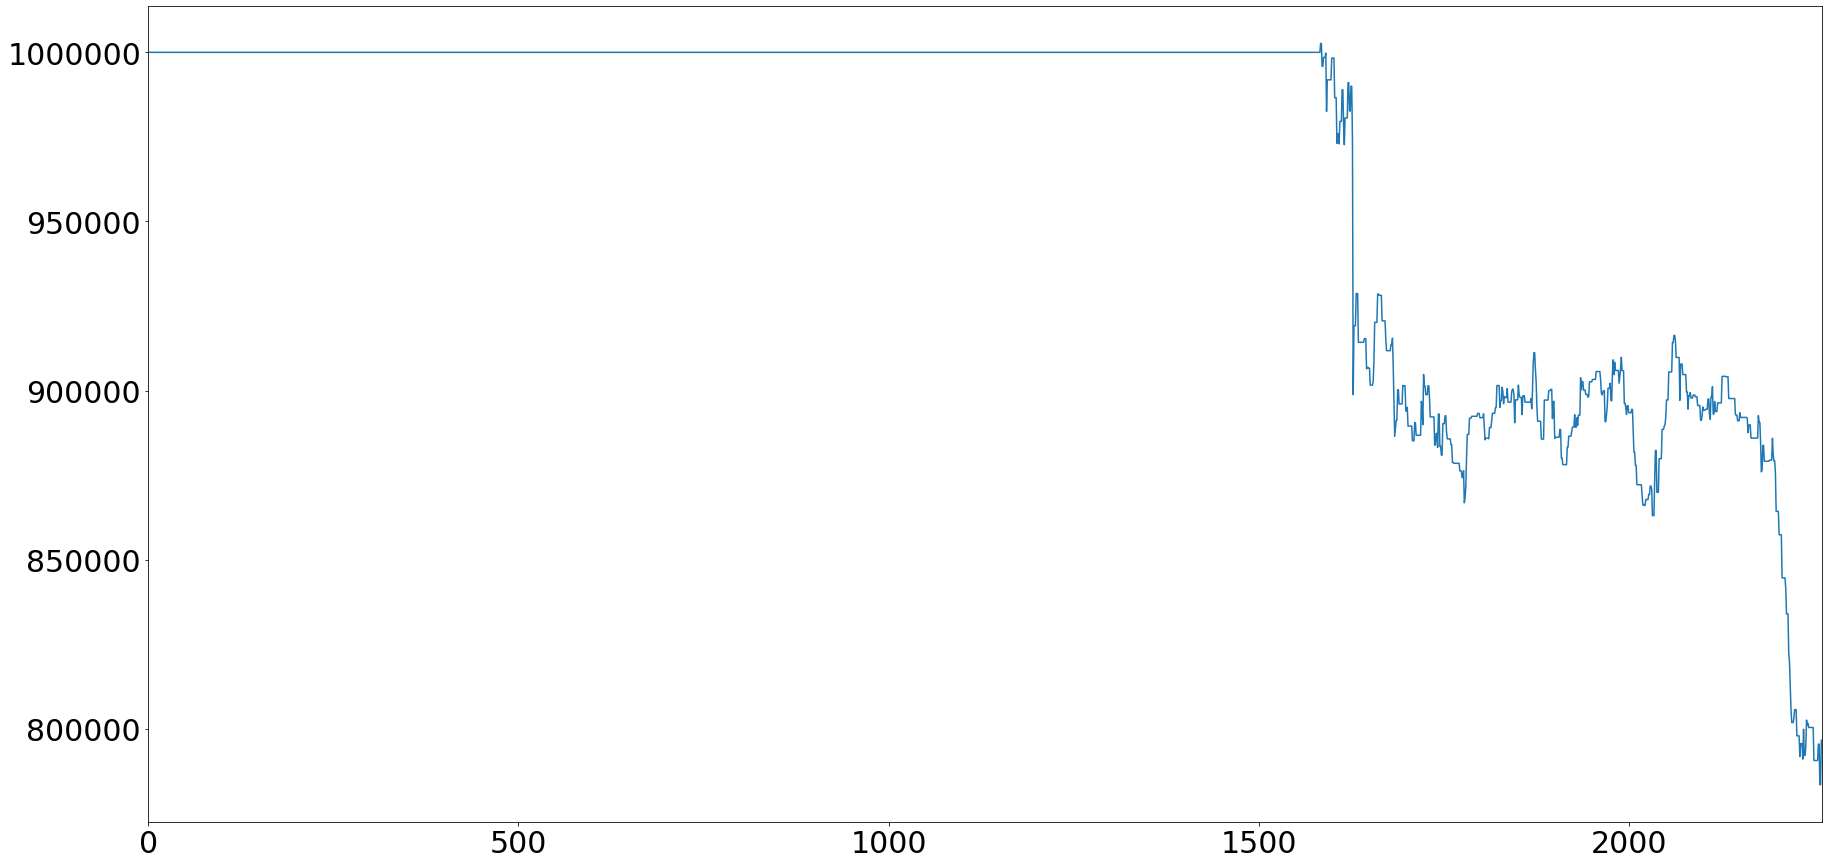

In [63]:
plt.figure(figsize=(30, 15))
stoxx_data["portfolio value"].plot()
plt.tick_params(labelsize=30)
plt.show()

In [539]:
stoxx_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,...,WMA_7,CMO_14,MOM_7,CCI_14,ROC_30,factor_combined,portfolio value,profit,group,MOM_10
2500,2019-12-12,3689.669922,3723.600098,3675.629883,3706.350098,3706.350098,40502800,18.900147,0.539253,0.626518,...,0.969981,0.668558,0.680848,0.572537,0.638480,1.100737,1.254125e+06,7514.870880,0,0.631642
2501,2019-12-13,3720.649902,3765.699951,3720.649902,3731.070068,3731.070068,49284900,24.719970,0.550434,0.596622,...,0.973548,0.736182,0.653802,0.710093,0.641515,1.074459,1.261639e+06,12667.656288,1,0.658460
2502,2019-12-16,3738.909912,3778.469971,3738.909912,3772.739990,3772.739990,30015600,41.669922,0.583000,0.720916,...,0.979189,0.831242,0.713391,0.741816,0.640878,1.218003,1.274307e+06,-8320.368183,3,0.782596
2503,2019-12-17,3769.139893,3769.139893,3742.620117,3745.280029,3745.280029,37228600,-27.459961,0.450181,0.750603,...,0.981850,0.723539,0.633653,0.670125,0.616728,1.110103,1.265987e+06,-1909.128816,2,0.770255
2504,2019-12-18,3744.000000,3755.810059,3739.000000,3739.000000,3739.000000,33479600,-6.280029,0.490874,0.683868,...,0.983601,0.700038,0.649096,0.619866,0.605200,1.141784,1.264078e+06,51.656288,2,0.712358
2505,2019-12-19,3741.530029,3747.340088,3722.570068,3739.169922,3739.169922,35609900,0.169922,0.503266,0.695777,...,0.984734,0.700490,0.649730,0.580194,0.594165,1.152186,1.264129e+06,11366.601648,2,0.724982
2506,2019-12-20,3740.709961,3776.560059,3738.219971,3776.560059,3776.560059,84848100,37.390137,0.574777,0.627467,...,0.987695,0.793205,0.673895,0.624477,0.621465,1.156056,1.275496e+06,30.255459,2,0.717843
2507,2019-12-23,3775.070068,3778.979980,3767.800049,3776.659912,3776.659912,23064700,0.099853,0.503131,0.648353,...,0.989824,0.793435,0.652978,0.626398,0.623301,1.087732,1.275526e+06,1699.862724,1,0.739051
2508,2019-12-27,3776.820068,3794.929932,3775.260010,3782.270020,3782.270020,24437900,5.610108,0.513718,0.470307,...,0.991662,0.807068,0.631717,0.630199,0.617122,0.864199,1.277226e+06,-10241.414847,-1,0.745342
2509,2019-12-30,3780.439941,3780.439941,3748.469971,3748.469971,3748.469971,18684000,-33.800049,0.437999,0.475148,...,0.990793,0.661496,0.547752,0.552400,0.604318,0.840779,1.266985e+06,0.000000,-1,0.693558


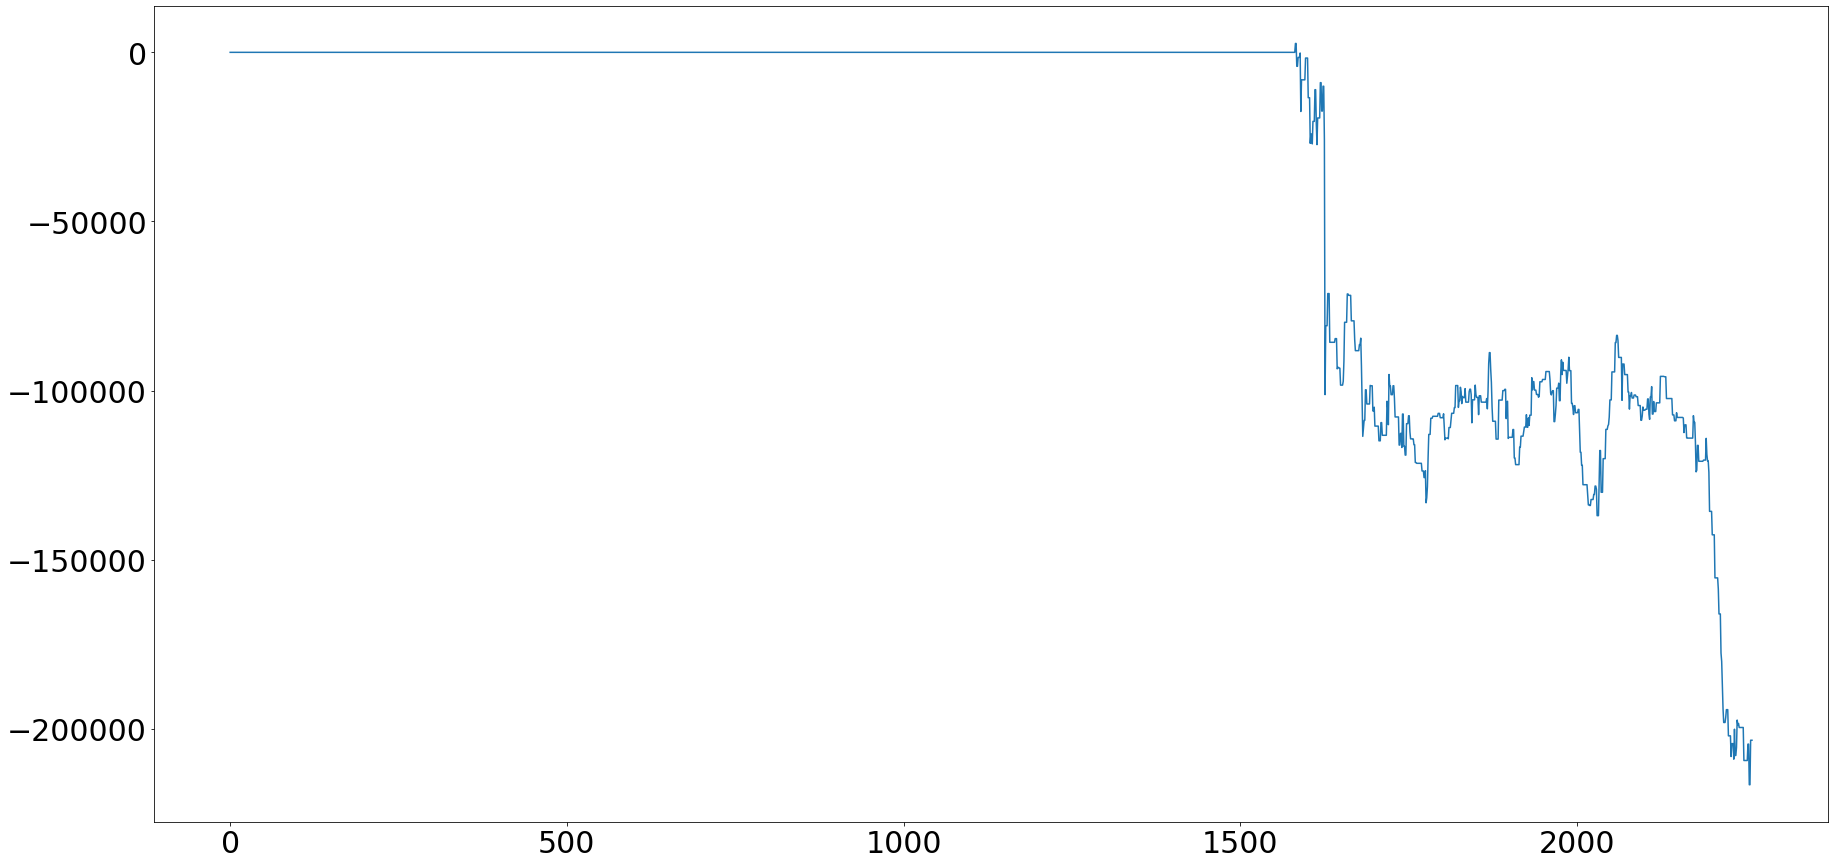

In [65]:
cum_profit = [stoxx_data.loc[0, "profit"]]
for i in range(1, len(stoxx_data)):
    cum_profit.append(cum_profit[i-1] + stoxx_data.loc[i, "profit"])
plt.figure(figsize=(30, 15))
plt.tick_params(labelsize=30)
plt.plot(cum_profit)
plt.show()

In [541]:
profit, price_change = stoxx_data["profit"], stoxx_data["price_change"]
print("positive profit times: ", len(profit[profit >= 0]))
print("negative profit times: ", len(profit[profit < 0]))

positive profit times:  1304
negative profit times:  1206


SpearmanrResult(correlation=0.16258481120804394, pvalue=2.4848986464593506e-16)
-----------------------------------------------------
count    2510.000000
mean        1.081112
std         0.224444
min        -0.640401
25%         0.959452
50%         1.076629
75%         1.194051
max         2.857674
Name: factor_combined, dtype: float64
-----------------------------------------------------


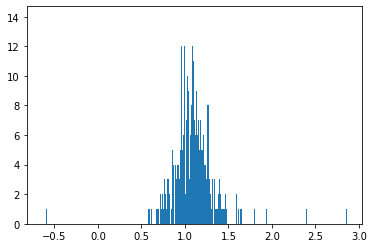

In [542]:
print(stats.spearmanr(stoxx_data[["factor_combined", "profit"]]))
print("-----------------------------------------------------")
print(stoxx_data["factor_combined"].describe())
print("-----------------------------------------------------")
plt.hist(stoxx_data["factor_combined"], bins=2600)
plt.show()

In [543]:
group = []
for i in range(len(stoxx_data)):
    group.append(int(stoxx_data.loc[i, "factor_combined"] // 0.1))
stoxx_data["group"] = group
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,...,WMA_7,CMO_14,MOM_7,CCI_14,ROC_30,factor_combined,portfolio value,profit,group,MOM_10
2505,2019-12-19,3741.530029,3747.340088,3722.570068,3739.169922,3739.169922,35609900,0.169922,0.503266,0.695777,...,0.984734,0.700490,0.649730,0.580194,0.594165,1.152186,1.264129e+06,11366.601648,11,0.724982
2506,2019-12-20,3740.709961,3776.560059,3738.219971,3776.560059,3776.560059,84848100,37.390137,0.574777,0.627467,...,0.987695,0.793205,0.673895,0.624477,0.621465,1.156056,1.275496e+06,30.255459,11,0.717843
2507,2019-12-23,3775.070068,3778.979980,3767.800049,3776.659912,3776.659912,23064700,0.099853,0.503131,0.648353,...,0.989824,0.793435,0.652978,0.626398,0.623301,1.087732,1.275526e+06,1699.862724,10,0.739051
2508,2019-12-27,3776.820068,3794.929932,3775.260010,3782.270020,3782.270020,24437900,5.610108,0.513718,0.470307,...,0.991662,0.807068,0.631717,0.630199,0.617122,0.864199,1.277226e+06,-10241.414847,8,0.745342
2509,2019-12-30,3780.439941,3780.439941,3748.469971,3748.469971,3748.469971,18684000,-33.800049,0.437999,0.475148,...,0.990793,0.661496,0.547752,0.552400,0.604318,0.840779,1.266985e+06,0.000000,8,0.693558


-7
count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: profit, dtype: float64


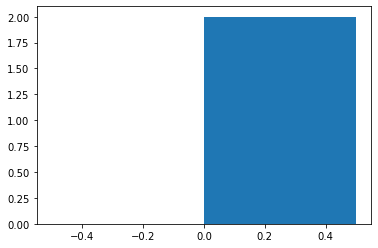

----------------------------
-6
count    7.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: profit, dtype: float64


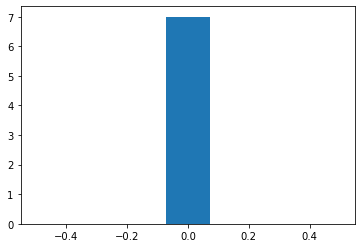

----------------------------
3
count       1.000000
mean     5391.755802
std              NaN
min      5391.755802
25%      5391.755802
50%      5391.755802
75%      5391.755802
max      5391.755802
Name: profit, dtype: float64


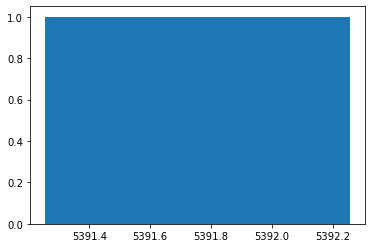

----------------------------
4
count        2.000000
mean    -11634.970648
std      18248.835338
min     -24538.845864
25%     -18086.908256
50%     -11634.970648
75%      -5183.033039
max       1268.904569
Name: profit, dtype: float64


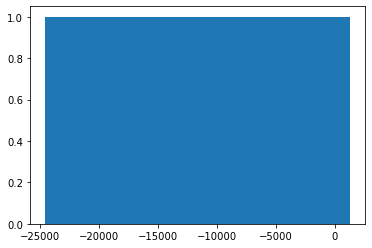

----------------------------
5
count        5.000000
mean    -16383.387511
std      14888.423354
min     -32111.621946
25%     -29238.676930
50%     -18051.294110
75%      -3871.896900
max       1356.552333
Name: profit, dtype: float64


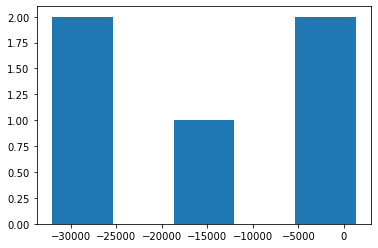

----------------------------
6
count       33.000000
mean     -8608.904863
std      18344.181360
min     -80886.935871
25%     -15480.566928
50%      -5845.913920
75%       3924.572720
max      12866.030503
Name: profit, dtype: float64


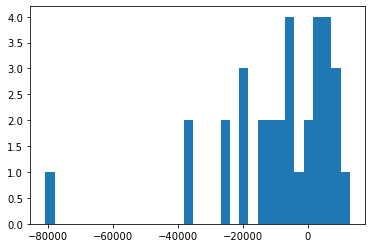

----------------------------
7
count       92.000000
mean     -3878.110668
std      11946.795969
min     -38222.546320
25%     -10759.196006
50%        -32.042378
75%       3294.976514
max      25360.747104
Name: profit, dtype: float64


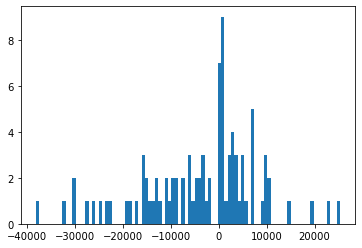

----------------------------
8
count      248.000000
mean     -3474.306027
std       9859.149150
min     -37705.310820
25%     -10262.849669
50%      -1341.106709
75%       3609.942051
max      15913.500000
Name: profit, dtype: float64


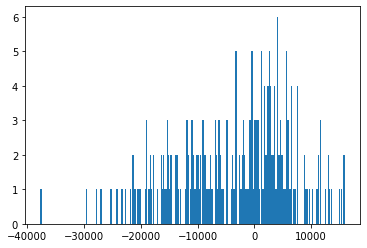

----------------------------
9
count      432.000000
mean     -1016.112516
std       9941.595221
min     -46198.475145
25%      -6663.658739
50%        419.178553
75%       5518.240026
max      23243.748066
Name: profit, dtype: float64


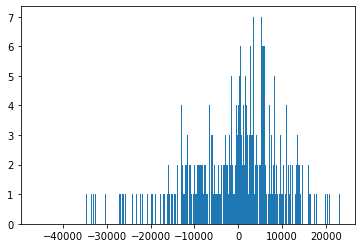

----------------------------
10
count      584.000000
mean        94.394271
std       9313.405106
min     -39403.857174
25%      -4943.466307
50%        347.850646
75%       5828.788247
max      28247.073070
Name: profit, dtype: float64


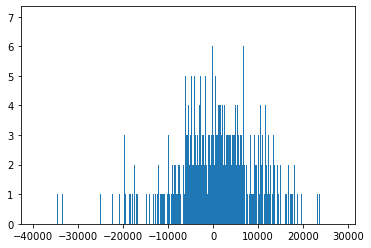

----------------------------
11
count      501.000000
mean      1084.854964
std       8695.674977
min     -29302.410981
25%      -3924.572720
50%        717.664024
75%       6192.372051
max      35196.218058
Name: profit, dtype: float64


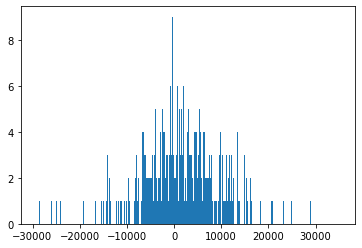

----------------------------
12
count      326.000000
mean      1365.271338
std      10932.693386
min     -39096.143140
25%      -4543.009300
50%        -15.284811
75%       8254.978272
max      34513.510836
Name: profit, dtype: float64


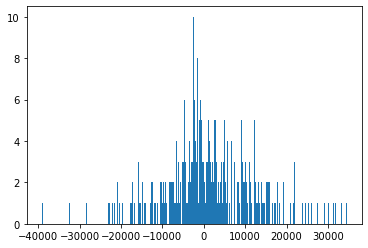

----------------------------
13
count      151.000000
mean      3610.213989
std      12283.908715
min     -34481.293800
25%      -3147.493669
50%       2452.211895
75%      12382.256735
max      34057.753572
Name: profit, dtype: float64


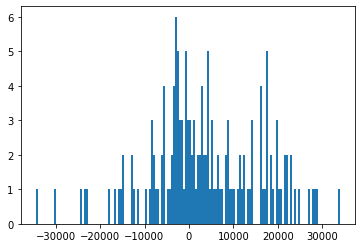

----------------------------
14
count       64.000000
mean      6065.560442
std      14592.088293
min     -38898.869440
25%      -1462.840878
50%       6264.036163
75%      15281.417241
max      43592.236580
Name: profit, dtype: float64


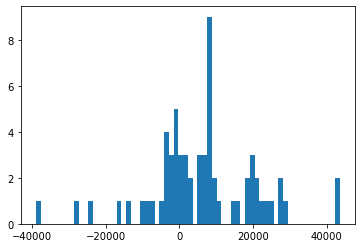

----------------------------
15
count       19.000000
mean      6738.346485
std      24885.548727
min     -53204.255802
25%      -2227.349664
50%       9059.670609
75%      22609.289862
max      44685.856845
Name: profit, dtype: float64


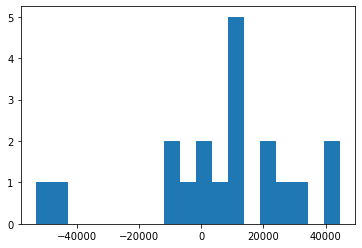

----------------------------
16
count       19.000000
mean      2639.416292
std      17985.733021
min     -33914.384712
25%      -4891.511477
50%       -254.358212
75%      13860.749809
max      33177.909150
Name: profit, dtype: float64


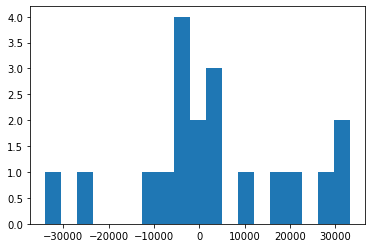

----------------------------
17
count        6.000000
mean      8660.658428
std      25765.049527
min     -26560.778920
25%     -10824.239968
50%      13677.766475
75%      29685.770610
max      35139.000000
Name: profit, dtype: float64


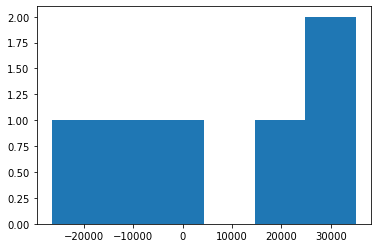

----------------------------
18
count        5.000000
mean     -2257.582867
std      16987.203928
min     -27707.356860
25%      -5189.822730
50%        438.831294
75%       1617.895833
max      19552.538127
Name: profit, dtype: float64


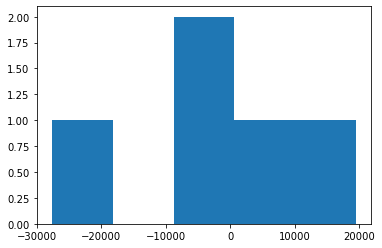

----------------------------
19
count        5.000000
mean     -7206.188169
std      31924.530984
min     -40160.162196
25%     -24755.370318
50%     -24327.564129
75%      19426.790757
max      33785.365043
Name: profit, dtype: float64


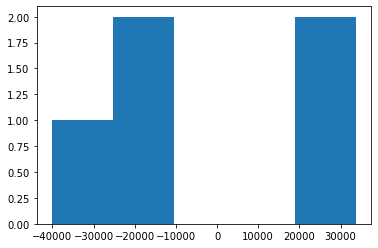

----------------------------
20
count        2.000000
mean      7910.941731
std       3547.869527
min       5402.219130
25%       6656.580431
50%       7910.941731
75%       9165.303031
max      10419.664332
Name: profit, dtype: float64


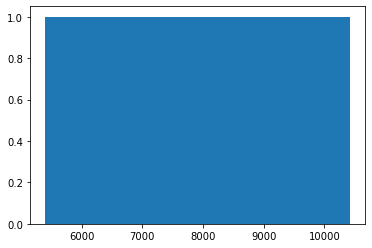

----------------------------
21
count        2.000000
mean     23160.437045
std      30239.504923
min       1777.878054
25%      12469.157549
50%      23160.437045
75%      33851.716540
max      44542.996036
Name: profit, dtype: float64


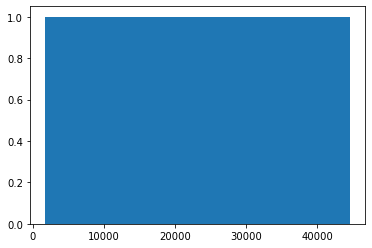

----------------------------
22
count        1.000000
mean     29034.120132
std               NaN
min      29034.120132
25%      29034.120132
50%      29034.120132
75%      29034.120132
max      29034.120132
Name: profit, dtype: float64


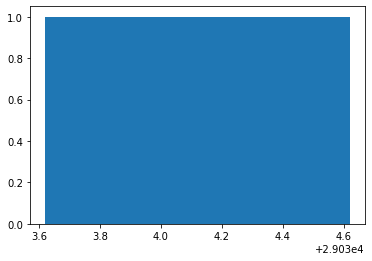

----------------------------
23
count        2.000000
mean     32971.914331
std      67156.594738
min     -14514.969210
25%       9228.472560
50%      32971.914331
75%      56715.356101
max      80458.797871
Name: profit, dtype: float64


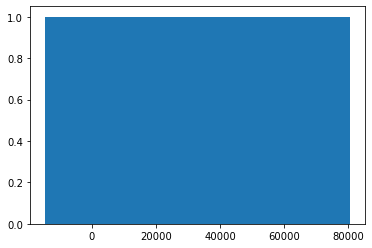

----------------------------
28
count       1.000000
mean    -8750.253204
std              NaN
min     -8750.253204
25%     -8750.253204
50%     -8750.253204
75%     -8750.253204
max     -8750.253204
Name: profit, dtype: float64


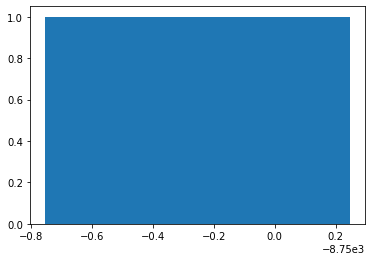

----------------------------


In [544]:
for name, group in stoxx_data["profit"].groupby(stoxx_data["group"]):
    print(name)
    print(group.describe())
    plt.hist(group, bins = len(group))
    plt.show()
    print("----------------------------")

In [37]:
-5 // 10

-1

In [38]:
stoxx_data.sort_values("price_change")

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,10_days_RSI,portfolio value,profit,group
1627,2016-06-24,3030.929932,3030.929932,2736.429932,2776.090088,2776.090088,235845300,-261.770019,31.067769,3.772453e+06,0.000000,6
1416,2015-08-24,3174.929932,3186.399902,2973.159912,3073.389893,3073.389893,139619200,-173.870117,43.287109,3.163551e+06,0.000000,8
1376,2015-06-29,3544.290039,3544.290039,3449.139893,3468.899902,3468.899902,93594300,-152.470215,43.977885,3.265501e+06,0.000000,8
406,2011-08-10,2313.659912,2334.800049,2146.070068,2153.770020,2153.770020,0,-140.469970,34.361640,1.111989e+06,0.000000,6
91,2010-05-14,2755.830078,2755.830078,2616.979980,2633.919922,2633.919922,0,-130.390137,61.693124,1.090637e+06,470.074946,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1371,2015-06-22,3497.090088,3601.879883,3497.090088,3596.070068,3596.070068,81570600,140.270019,53.901922,3.247230e+06,21587.729966,10
394,2011-07-22,2763.439941,2796.570068,2754.070068,2772.600098,2772.600098,0,140.620118,50.761003,1.296332e+06,-11182.654978,10
462,2011-10-27,2361.679932,2482.919922,2361.679932,2476.919922,2476.919922,0,141.859863,68.766208,1.232586e+06,-5794.806370,13
1417,2015-08-25,3105.520020,3237.520020,3105.479980,3218.010010,3218.010010,103513400,144.620117,44.162711,3.163551e+06,0.000000,8


In [39]:
stoxx_data_sort_change = stoxx_data.sort_values("price_change")
stoxx_data_sort_change.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,10_days_RSI,portfolio value,profit,group
1627,2016-06-24,3030.929932,3030.929932,2736.429932,2776.090088,2776.090088,235845300,-261.770019,31.067769,3.772453e+06,0.000000,6
1416,2015-08-24,3174.929932,3186.399902,2973.159912,3073.389893,3073.389893,139619200,-173.870117,43.287109,3.163551e+06,0.000000,8
1376,2015-06-29,3544.290039,3544.290039,3449.139893,3468.899902,3468.899902,93594300,-152.470215,43.977885,3.265501e+06,0.000000,8
406,2011-08-10,2313.659912,2334.800049,2146.070068,2153.770020,2153.770020,0,-140.469970,34.361640,1.111989e+06,0.000000,6
91,2010-05-14,2755.830078,2755.830078,2616.979980,2633.919922,2633.919922,0,-130.390137,61.693124,1.090637e+06,470.074946,12
465,2011-11-01,2352.760010,2352.760010,2241.689941,2259.729980,2259.729980,0,-125.489991,53.317995,1.145768e+06,13024.764765,10
400,2011-08-02,2581.590088,2591.500000,2543.629883,2544.889893,2544.889893,0,-125.480224,63.152552,1.210871e+06,-17882.729700,12
1489,2015-12-03,3464.810059,3514.389893,3343.340088,3343.340088,3343.340088,84501300,-125.319824,45.759254,3.429372e+06,0.000000,9
412,2011-08-18,2313.159912,2313.159912,2177.290039,2206.610107,2206.610107,0,-124.510010,33.659276,1.111989e+06,0.000000,6
1507,2016-01-04,3266.010010,3266.010010,3147.879883,3164.760010,3164.760010,56241300,-123.219970,39.010257,3.477626e+06,0.000000,7


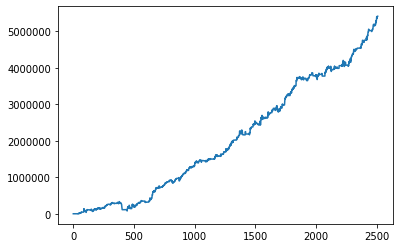

In [40]:
plt.plot(cum_profit)
plt.show()